In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [18]:
# Our dataset 
df = pd.read_csv('student-mat.csv', delimiter=';')  
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


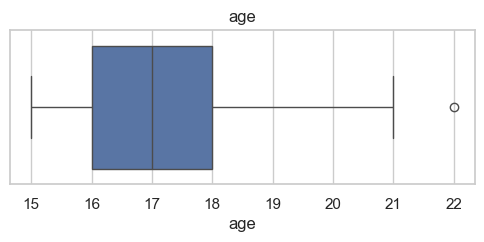

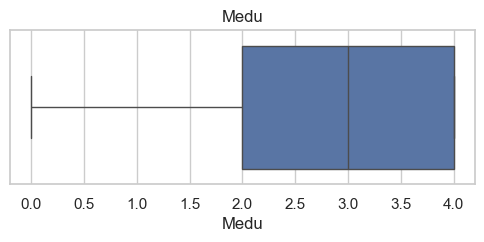

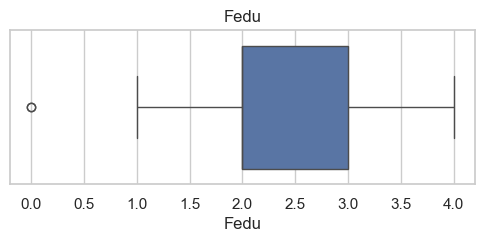

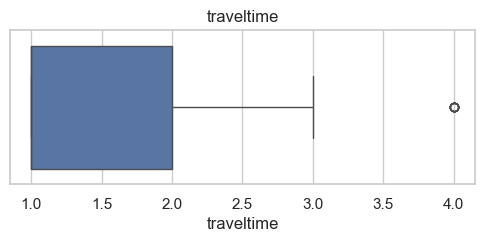

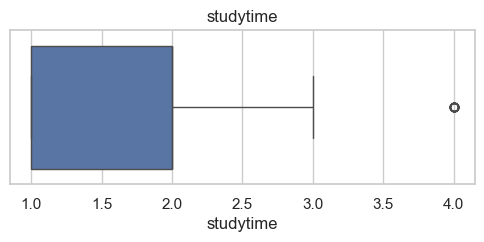

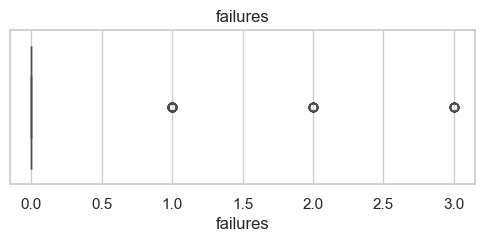

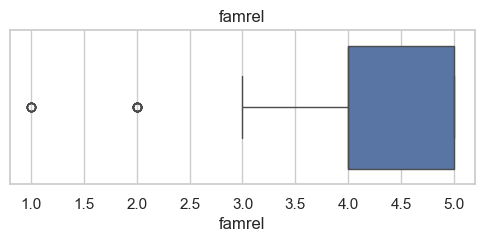

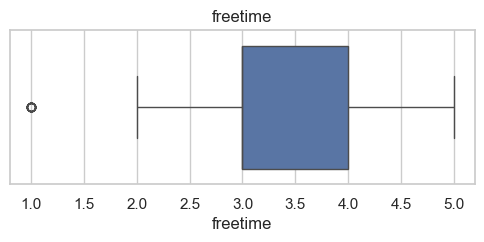

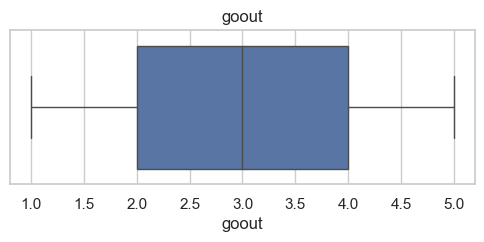

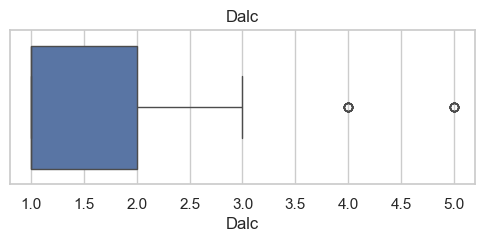

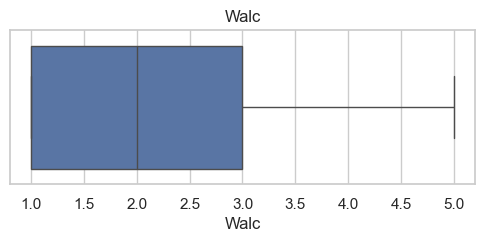

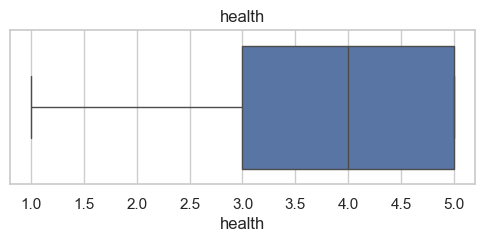

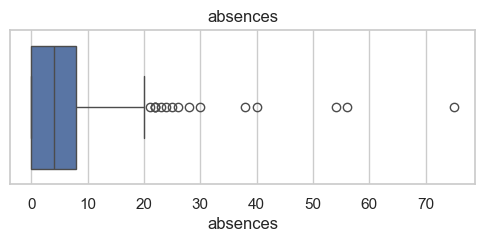

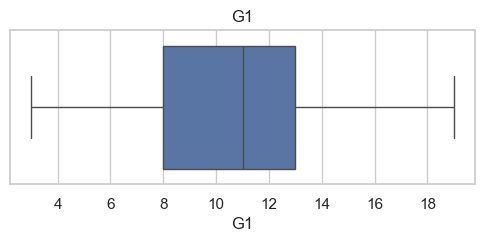

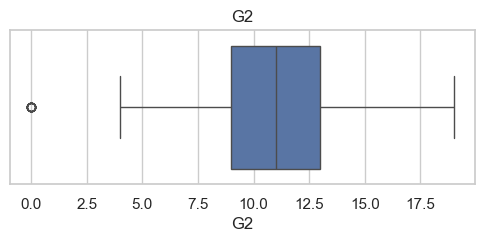

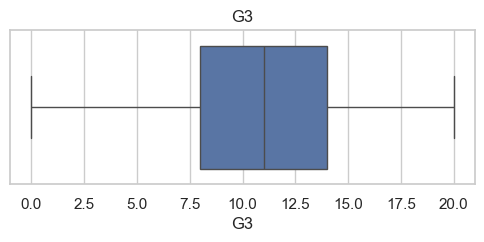

In [19]:
 # Each column presented using boxplot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

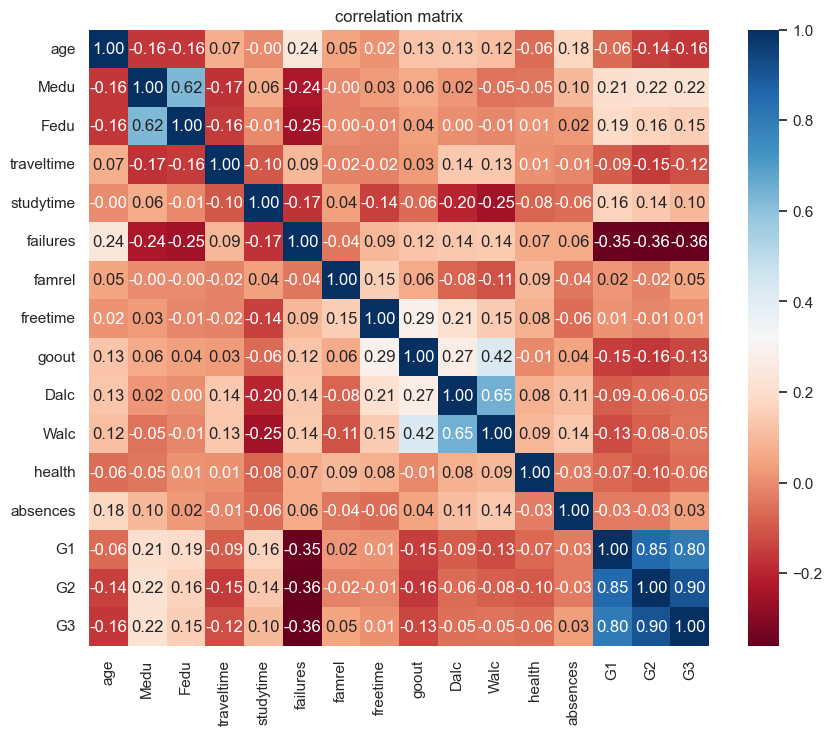

In [20]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='RdBu')
plt.title('correlation matrix')
plt.show()

In [21]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", cat_cols)
print("Number columns:", num_cols)



Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Number columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [22]:
# category razdelenie EZHE BLYA

df['G3_category'] = pd.cut(
    df['G3'],
    bins=[-1, 9, 13, 16, 20],
    labels=['Fail', 'Pass', 'Good', 'Excellent']
)


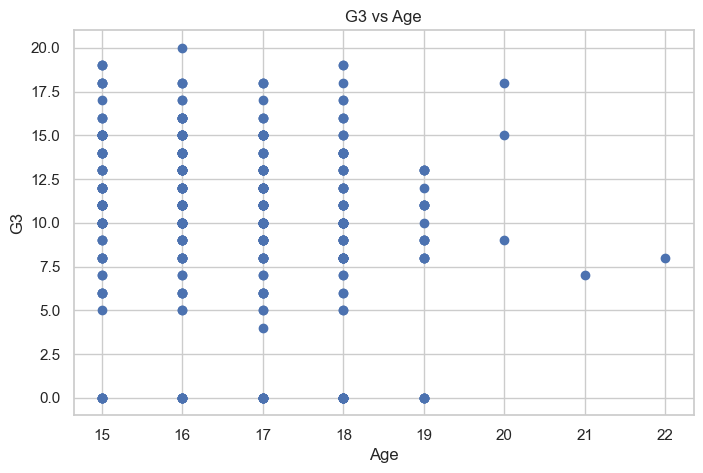

C:\Users\user\AppData\Local\Temp\ipykernel_6184\3044551334.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['F', 'M'])


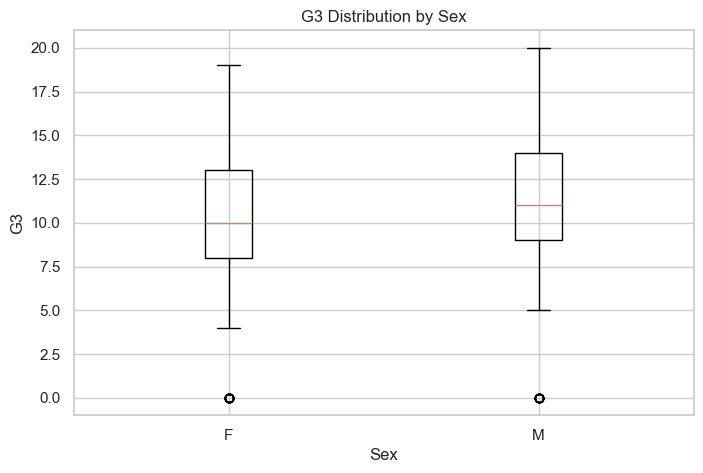

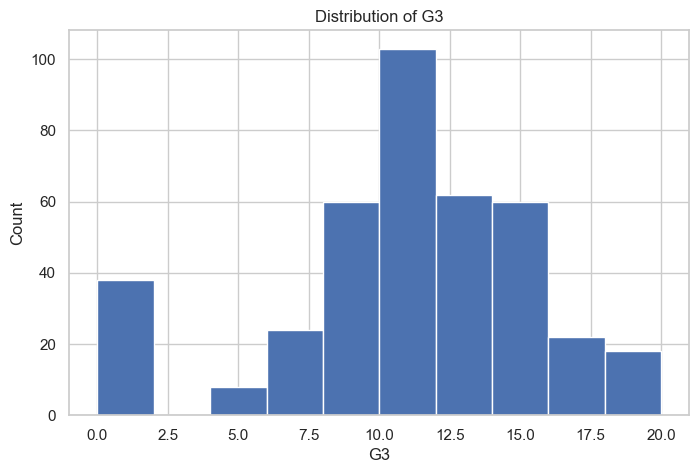

In [23]:
# ========= 1. Scatter plot: G3 vs Age =========
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['G3'])
plt.xlabel('Age')
plt.ylabel('G3')
plt.title('G3 vs Age')
plt.grid(True)
plt.show()

# ========= 2. Boxplot: G3 по полу =========
plt.figure(figsize=(8, 5))
data = [df[df['sex'] == 'F']['G3'], df[df['sex'] == 'M']['G3']]
plt.boxplot(data, labels=['F', 'M'])
plt.xlabel('Sex')
plt.ylabel('G3')
plt.title('G3 Distribution by Sex')
plt.grid(True)
plt.show()

# ========= 3. Histogram: распределение G3 =========
plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=10)
plt.xlabel('G3')
plt.ylabel('Count')
plt.title('Distribution of G3')
plt.grid(True)
plt.show()

In [ ]:


df = pd.read_csv('student-mat.csv', sep=';')


y = df['G3']


X = df.drop('G3', axis=1).copy()

label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = DecisionTreeRegressor(
    criterion='squared_error',   # это MSE
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse_builtin = mean_squared_error(y_test, y_pred)
print("MSE (sklearn):", mse_builtin)


def custom_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_custom = custom_mse(y_test.values, y_pred)
print("MSE (custom):", mse_custom)


print("Example of prediction G3:", y_pred[:5])


MSE (sklearn): 5.658227848101266
MSE (custom): 5.658227848101266
Пример предсказания G3: [ 8. 12.  8. 10. 10.]
